In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

from matplotlib import pyplot as plt
import tensorflow as tf

In [13]:
data = load_digits()

In [14]:
X = data.data
y = data.target
images = data.images
print(X.shape,y.shape,images.shape)

(1797, 64) (1797,) (1797, 8, 8)


1


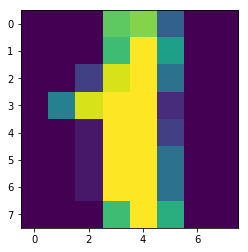

In [16]:
print(y[1])
plt.imshow(images[1])